***Predicting Price of Ikea Products with Machine Learning***

*By David Noorcahya*


#Data Understanding

Notebook ini merupakan praktek teknik web scraping yang telah diterapkan di website IKEA Arab Saudi untuk kategori furniture.

Tautan Kaggle: https://www.kaggle.com/ahmedkallam/ikea-sa-furniture-web-scraping

Tautan situs web yang dilakukan scraping: https://www.ikea.com/sa/en/cat/furniture-fu001/

Data yang diminta hingga 20/4/2020.
Library yang digunakan adalah BeautifulSoup dan Selenium untuk web scraping

***Content:***

Unnamed: Merupakan nomor urutan dari data

item_id : id item yang dapat digunakan nanti untuk bergabung dengan kerangka data IKEA lainnya

name: nama komersial barang

catgory: kategori furnitur tempat barang itu berada

price: harga saat ini dalam mata uang Saudi Arabia seperti yang ditampilkan di situs web

old_price: harga barang sebelum diskon

Short_description: deskripsi singkat tentang item

designer: Nama desainer yang mendesain item.

width: Lebar item dalam Centimeter

height: Tinggi item dalam Centimeter

depth: Kedalaman item dalam Centimeter

sellable_Online: jika item tersedia untuk pembelian online atau hanya di toko

other_colors: jika warna lain tersedia untuk item tersebut, atau hanya satu warna seperti yang ditampilkan di situs web

link: tautan web item



#Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('IKEA_SA_Furniture_Web_Scrapings_sss.csv')

#Exploratory Data Analysis

##Initial EDA

In [ ]:
df.head(5)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [ ]:
df.sample(5)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
457,457,49301921,BESTÅ,Bookcases & shelving units,1155.0,No old price,True,https://www.ikea.com/sa/en/p/besta-storage-com...,Yes,"Storage combination w glass doors, ...",Carl Öjerstam/IKEA of Sweden,22.0,202.0,60.0
963,963,60347507,ENERYDA,Cabinets & cupboards,35.0,No old price,True,https://www.ikea.com/sa/en/p/eneryda-knob-bras...,Yes,"Knob, 35 mm",Francis Cayouette,NaN,NaN,NaN
424,424,87749600,OBSERVATÖR,Bookcases & shelving units,5.0,No old price,True,https://www.ikea.com/sa/en/p/observatoer-cross...,No,"Cross-brace, 100 cm",IKEA of Sweden,NaN,NaN,NaN
3112,3112,59287929,BEKANT,Tables & desks,3064.0,"SR 3,690",True,https://www.ikea.com/sa/en/p/bekant-desk-with-...,Yes,"Desk with screen, 160x160 55 cm",K Malmvall/E Lilja Löwenhielm,NaN,NaN,160.0
1621,1621,30309234,KULLEN,Chests of drawers & drawer units,199.0,No old price,True,https://www.ikea.com/sa/en/p/kullen-chest-of-3...,No,"Chest of 3 drawers, 70x72 cm",IKEA of Sweden,40.0,72.0,70.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


Terdapat beberapa data yang masih berbentuk object, maka harus diubah menjadi bentuk numeric agar bisa digunakan pada proses selanjutnya.

##Numerical data distribution

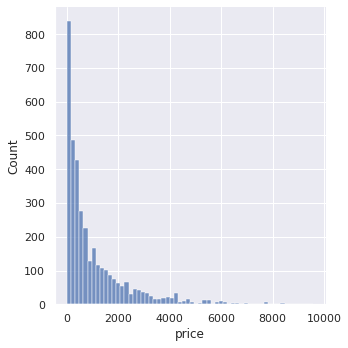

In [ ]:
# check the distribution of 'price' column
sns.displot(df['price'])

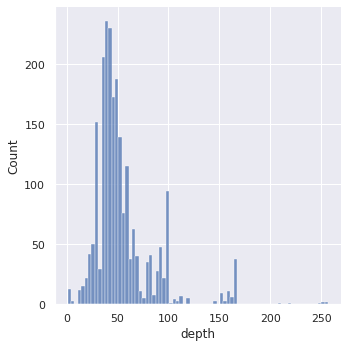

In [ ]:
# check the distribution of 'depth' column
sns.displot(df['depth'])

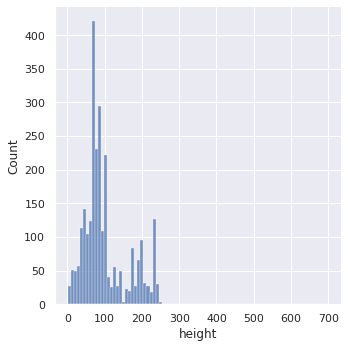

In [ ]:
# check the distribution of 'height' column
sns.displot(df['height'])

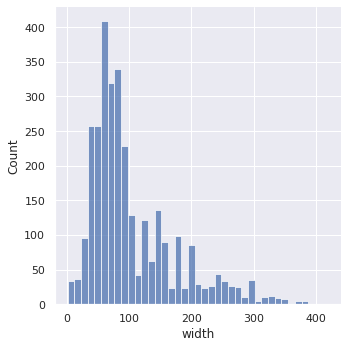

In [ ]:
# check the distribution of 'width' column
sns.displot(df['width'])

##Categorical data count

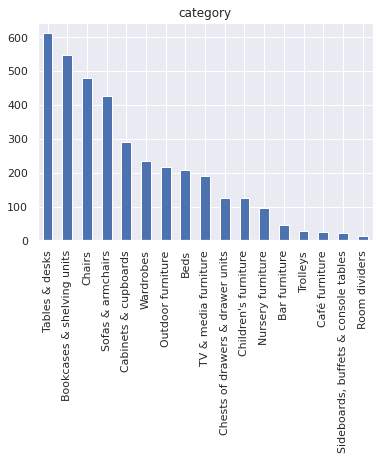

In [ ]:
#Data count category
df['category'].value_counts().plot(kind='bar')
plt.title("category")
plt.show()

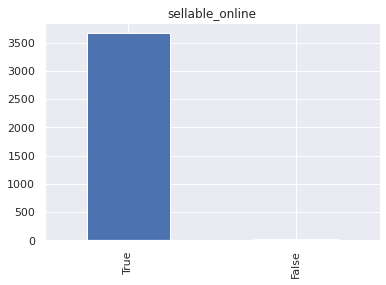

In [ ]:
#Data count sellable online
df['sellable_online'].value_counts().plot(kind='bar')
plt.title("sellable_online")
plt.show()

In [ ]:
len(df[(df['sellable_online']==True)])

3666

In [ ]:
len(df[(df['sellable_online']==False)])

28

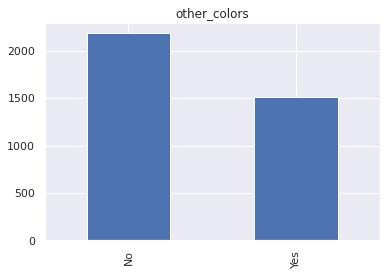

In [ ]:
#Data count other colors
df['other_colors'].value_counts().plot(kind='bar')
plt.title("other_colors")
plt.show()

In [ ]:
len(df[(df['other_colors']=="Yes")])

1512

In [ ]:
len(df[(df['other_colors']=="No")])

2182

##Outlier Analysis

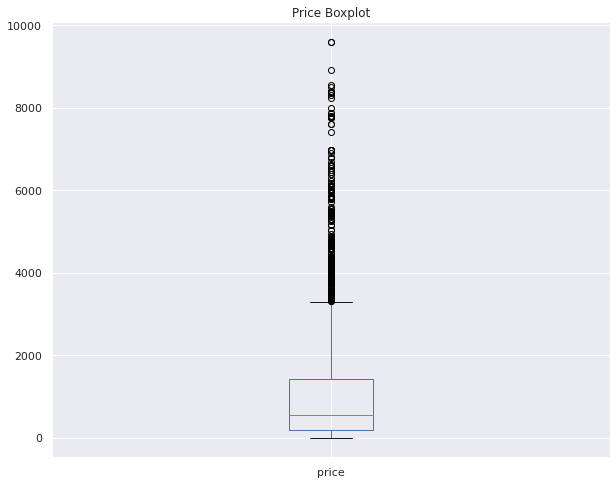

In [ ]:
#Outlier Analysis
df['price'].plot(kind='box',figsize=(10,8))
plt.title("Price Boxplot")
plt.show()

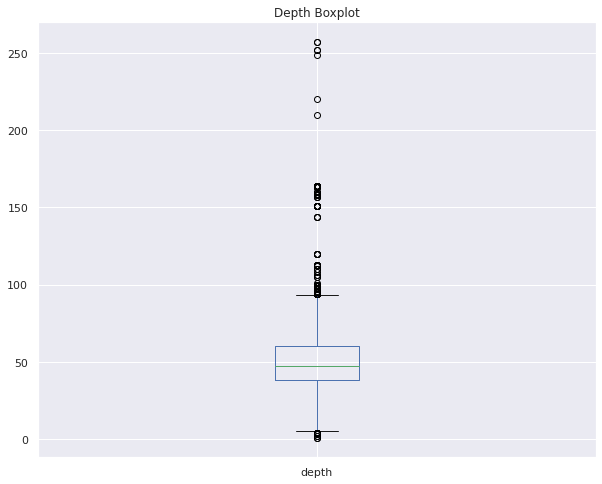

In [ ]:
#Outlier Analysis
df['depth'].plot(kind='box',figsize=(10,8))
plt.title("Depth Boxplot")
plt.show()

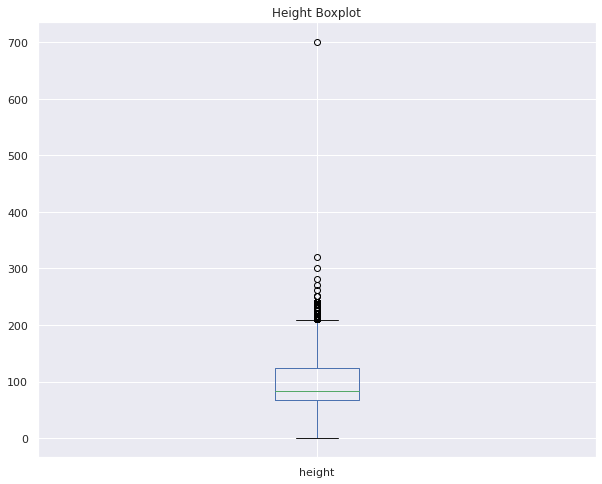

In [ ]:
#Outlier Analysis
df['height'].plot(kind='box',figsize=(10,8))
plt.title("Height Boxplot")
plt.show()

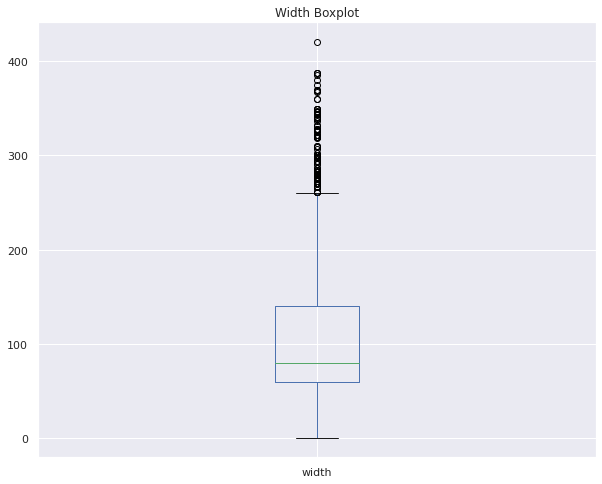

In [ ]:
#Outlier Analysis
df['width'].plot(kind='box',figsize=(10,8))
plt.title("Width Boxplot")
plt.show()

#Cleaning data

In [ ]:
df.head(5)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [ ]:
# Checking missing data in dataframe.
data = df[~df.isnull()].copy()

# Checking the missing values in the dataset.
df.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [ ]:
#remove baris yang memiliki missing value

df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 3 to 3688
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1899 non-null   int64  
 1   item_id            1899 non-null   int64  
 2   name               1899 non-null   object 
 3   category           1899 non-null   object 
 4   price              1899 non-null   float64
 5   old_price          1899 non-null   object 
 6   sellable_online    1899 non-null   bool   
 7   link               1899 non-null   object 
 8   other_colors       1899 non-null   object 
 9   short_description  1899 non-null   object 
 10  designer           1899 non-null   object 
 11  depth              1899 non-null   float64
 12  height             1899 non-null   float64
 13  width              1899 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 209.6+ KB


In [ ]:
df['sellable_online'] = df['sellable_online'].astype('str')
df['sellable_online'] = df['sellable_online'].str.replace('True', '1')
df['sellable_online'] = df['sellable_online'].str.replace('False', '0')
df['sellable_online'] = pd.to_numeric(df['sellable_online'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df['other_colors'] = df['other_colors'].str.replace('Yes', '1')
df['other_colors'] = df['other_colors'].str.replace('No', '0')
df['other_colors'] = pd.to_numeric(df['other_colors'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [ ]:
df['Bar furniture'] = df['category'].apply(lambda x: 1 if 'Bar furniture' in x else 0)
df['Beds'] = df['category'].apply(lambda x: 1 if 'Beds' in x else 0)
df['Bookcases & shelving'] = df['category'].apply(lambda x: 1 if 'Bookcases & shelving units' in x else 0)
df['Cabinets & cupboards'] = df['category'].apply(lambda x: 1 if 'Cabinets & cupboards' in x else 0)
df['Café furniture'] = df['category'].apply(lambda x: 1 if 'Café furniture' in x else 0)
df['Chairs'] = df['category'].apply(lambda x: 1 if 'Chairs' in x else 0)
df['Chests of drawers & drawer'] = df['category'].apply(lambda x: 1 if 'Chests of drawers & drawer units' in x else 0)
df["Children's"] = df['category'].apply(lambda x: 1 if "Children's furniture" in x else 0)
df['Nursery furniture'] = df['category'].apply(lambda x: 1 if 'Nursery furniture' in x else 0)
df['Outdoor furniture'] = df['category'].apply(lambda x: 1 if 'Outdoor furniture' in x else 0)
df['Room dividers'] = df['category'].apply(lambda x: 1 if 'Room dividers' in x else 0)
df['Sideboards, buffets & console tables'] = df['category'].apply(lambda x: 1 if 'Sideboards, buffets & console tables' in x else 0)
df['Sofas & armchairs'] = df['category'].apply(lambda x: 1 if 'Sofas & armchairs' in x else 0)
df['Tables & desks'] = df['category'].apply(lambda x: 1 if 'Tables & desks' in x else 0)
df['Trolleys'] = df['category'].apply(lambda x: 1 if 'Trolleys' in x else 0)
df["TV & media furniture"] = df['category'].apply(lambda x: 1 if "TV & media furniture" in x else 0)
df["Wardrobes"] = df['category'].apply(lambda x: 1 if "Wardrobes" in x else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df.drop('category', axis=1, inplace=True)

In [ ]:
df['old_price'].head(10) #checking old price data

3     No old price
4     No old price
5     No old price
6     No old price
8     No old price
10    No old price
11    No old price
12    No old price
13          SR 295
14    No old price
Name: old_price, dtype: object

In [ ]:
# Checking missing data in old price
data = df['old_price']=='No old price'
data.sum()

1541

In [ ]:
df.drop('old_price', axis=1, inplace=True)

In [ ]:
df['short_description'].sample(10)

1133                                             Recliner
681             Wall-mounted cabinet combination,     ...
1186                                             Armchair
1559                                        Chaise longue
2364                                          2-seat sofa
5                 Bar stool with backrest,          63 cm
427             Frame with mesh baskets,          50x5...
3490            Open wardrobe with sliding door,      ...
1901                        Shelf unit,          29x88 cm
1694                       Drawer unit,          33x70 cm
Name: short_description, dtype: object

In [ ]:
df['designer'].sample(10)

400                                        IKEA of Sweden
1063                                         Jon Karlsson
2475                                        Henrik Preutz
3507                       Ehlén Johansson/IKEA of Sweden
1715                                         Ola Wihlborg
129                                          Ola Wihlborg
241                        Ehlén Johansson/IKEA of Sweden
1723                                         Ola Wihlborg
3538    Ebba Strandmark/IKEA of Sweden/Ola Wihlborg/Eh...
2948                                         Ola Wihlborg
Name: designer, dtype: object

In [ ]:
#remove description, link, unnamed, name dan designer

df.drop('short_description', axis=1, inplace=True)
df.drop('designer', axis=1, inplace=True)
df.drop('link', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)

#Normalization

In [ ]:
df = np.log1p(df)

##Numerical data normal

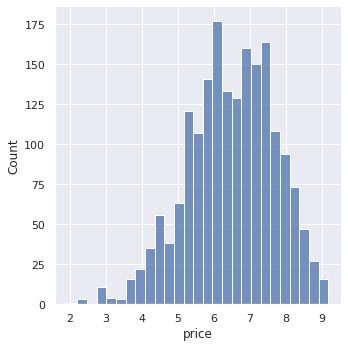

In [ ]:
# check the distribution of 'price' column
sns.displot(df['price'])

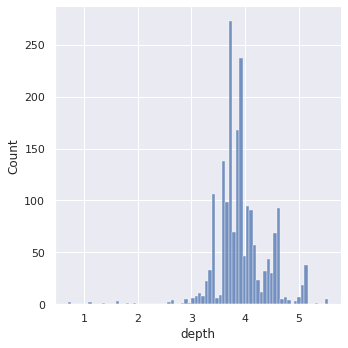

In [ ]:
# check the distribution of 'price' column
sns.displot(df['depth'])

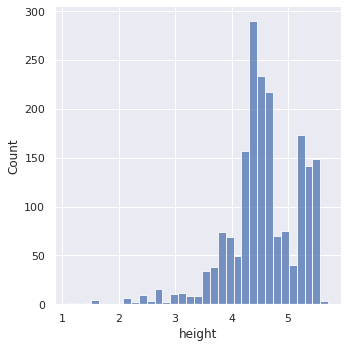

In [ ]:
# check the distribution of 'price' column
sns.displot(df['height'])

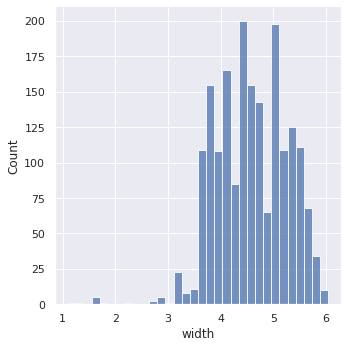

In [ ]:
# check the distribution of 'price' column
sns.displot(df['width'])

##Ourlier data normal

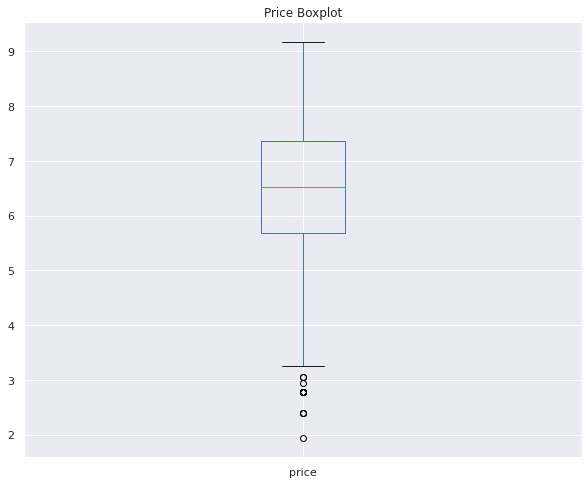

In [ ]:
#Outlier Analysis
df['price'].plot(kind='box',figsize=(10,8))
plt.title("Price Boxplot")
plt.show()

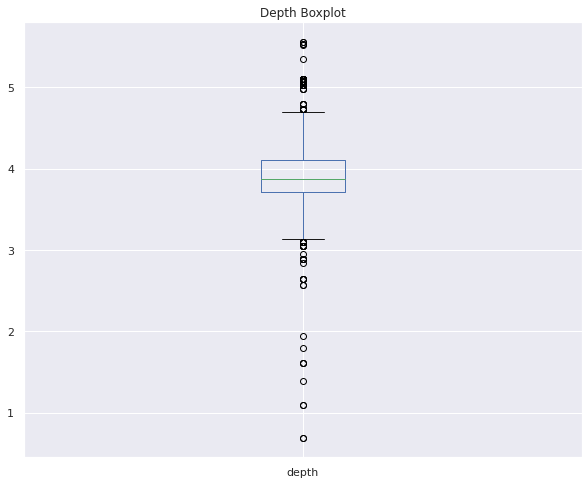

In [ ]:
#Outlier Analysis
df['depth'].plot(kind='box',figsize=(10,8))
plt.title("Depth Boxplot")
plt.show()

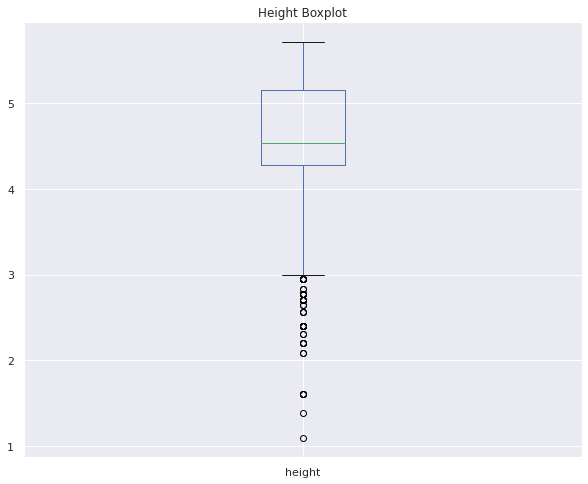

In [ ]:
#Outlier Analysis
df['height'].plot(kind='box',figsize=(10,8))
plt.title("Height Boxplot")
plt.show()

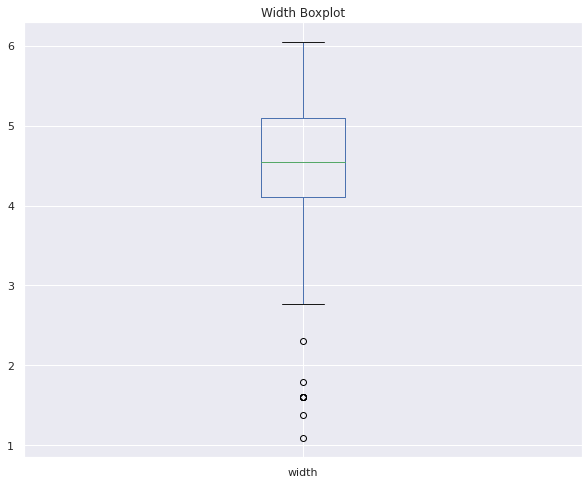

In [ ]:
#Outlier Analysis
df['width'].plot(kind='box',figsize=(10,8))
plt.title("Width Boxplot")
plt.show()

#Feature Engineering

In [ ]:
df['Dimension'] = df['height']*df['width']*df['depth']

In [ ]:
df.sample(5)

,item_id,price,sellable_online,other_colors,depth,height,width,Bar furniture,Beds,Bookcases & shelving,Cabinets & cupboards,Café furniture,Chairs,Chests of drawers & drawer,Children's,Nursery furniture,Outdoor furniture,Room dividers,"Sideboards, buffets & console tables",Sofas & armchairs,Tables & desks,Trolleys,TV & media furniture,Wardrobes,Dimension
323,18.413524,7.450080,0.693147,0.693147,3.713572,5.398163,5.351858,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,107.285843
3064,17.915734,6.206576,0.693147,0.000000,4.077537,4.262680,3.526361,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,61.292507
613,16.045217,5.017280,0.693147,0.000000,3.951244,4.262680,3.931826,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,66.223295
1304,18.307260,7.575072,0.693147,0.693147,4.543295,4.442651,4.736198,0.0,0.0,0.000000,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,95.596728
1474,17.735597,6.614726,0.693147,0.000000,3.931826,4.356709,3.912023,0.0,0.0,0.000000,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,67.012248


#Correlation Analysis

In [ ]:
df_corr = df.corr()
df_corr

,item_id,price,sellable_online,other_colors,depth,height,width,Bar furniture,Beds,Bookcases & shelving,Cabinets & cupboards,Café furniture,Chairs,Chests of drawers & drawer,Children's,Nursery furniture,Outdoor furniture,Room dividers,"Sideboards, buffets & console tables",Sofas & armchairs,Tables & desks,Trolleys,TV & media furniture,Wardrobes,Dimension
item_id,1.000000,0.097478,-0.001662,0.045903,0.074383,0.068180,0.123698,-0.084082,-0.007354,0.015780,0.009729,-0.090901,-0.079861,-0.007191,0.026100,0.009682,-0.003689,-0.014302,-0.004046,0.054726,0.007252,-0.043555,0.020272,0.034005,0.118809
price,0.097478,1.000000,0.168061,0.213422,0.545825,0.494220,0.772201,-0.075085,0.174272,-0.174042,0.030627,-0.050916,-0.190356,-0.063032,-0.177456,-0.121775,-0.037408,0.008455,0.036132,0.360244,-0.125353,-0.014574,0.015190,0.273380,0.841560
sellable_online,-0.001662,0.168061,1.000000,0.028589,0.078872,0.101575,0.095543,-0.047778,0.017183,0.041184,0.028406,0.006893,-0.010966,0.021658,-0.143715,-0.128492,0.017525,0.004674,0.008565,0.030284,0.019882,-0.087260,0.019052,0.028406,0.118996
other_colors,0.045903,0.213422,0.028589,1.000000,0.116799,-0.009651,0.165031,-0.080331,0.056199,-0.020910,0.180793,-0.054156,-0.104152,-0.017464,-0.060646,-0.039994,-0.087932,0.058630,0.055814,0.199792,-0.029840,-0.050916,0.098762,-0.180555,0.116498
depth,0.074383,0.545825,0.078872,0.116799,1.000000,0.122208,0.398830,-0.014182,0.181003,-0.339817,-0.200217,-0.020481,0.106279,-0.037143,-0.084127,-0.074249,0.144059,-0.029617,-0.044155,0.526846,-0.083012,-0.015989,-0.116071,0.071930,0.633115
height,0.068180,0.494220,0.101575,-0.009651,0.122208,1.000000,0.360488,-0.003985,-0.170607,0.136155,0.050053,-0.025897,-0.119477,-0.099187,-0.087602,-0.048028,-0.056749,0.044266,0.019598,-0.096351,-0.130112,-0.006873,-0.026414,0.419406,0.669698
width,0.123698,0.772201,0.095543,0.165031,0.398830,0.360488,1.000000,-0.125681,0.156057,0.009825,-0.021247,-0.084420,-0.278601,-0.137115,-0.138215,-0.104153,-0.038264,0.040453,0.036572,0.307784,-0.141455,-0.023804,0.140088,0.214670,0.831022
Bar furniture,-0.084082,-0.075085,-0.047778,-0.080331,-0.014182,-0.003985,-0.125681,1.000000,-0.023415,-0.056121,-0.038709,-0.009393,-0.040213,-0.029514,-0.023415,-0.020785,-0.023881,-0.006369,-0.011672,-0.041269,-0.027094,-0.007807,-0.025963,-0.038709,-0.078967
Beds,-0.007354,0.174272,0.017183,0.056199,0.181003,-0.170607,0.156057,-0.023415,1.000000,-0.102663,-0.070810,-0.017183,-0.073562,-0.053991,-0.042834,-0.038022,-0.043686,-0.011652,-0.021352,-0.075493,-0.049563,-0.014282,-0.047494,-0.070810,0.065717
Bookcases & shelving,0.015780,-0.174042,0.041184,-0.020910,-0.339817,0.136155,0.009825,-0.056121,-0.102663,1.000000,-0.169717,-0.041184,-0.176313,-0.129405,-0.102663,-0.091131,-0.104705,-0.027927,-0.051177,-0.180942,-0.118792,-0.034231,-0.113833,-0.169717,-0.070075


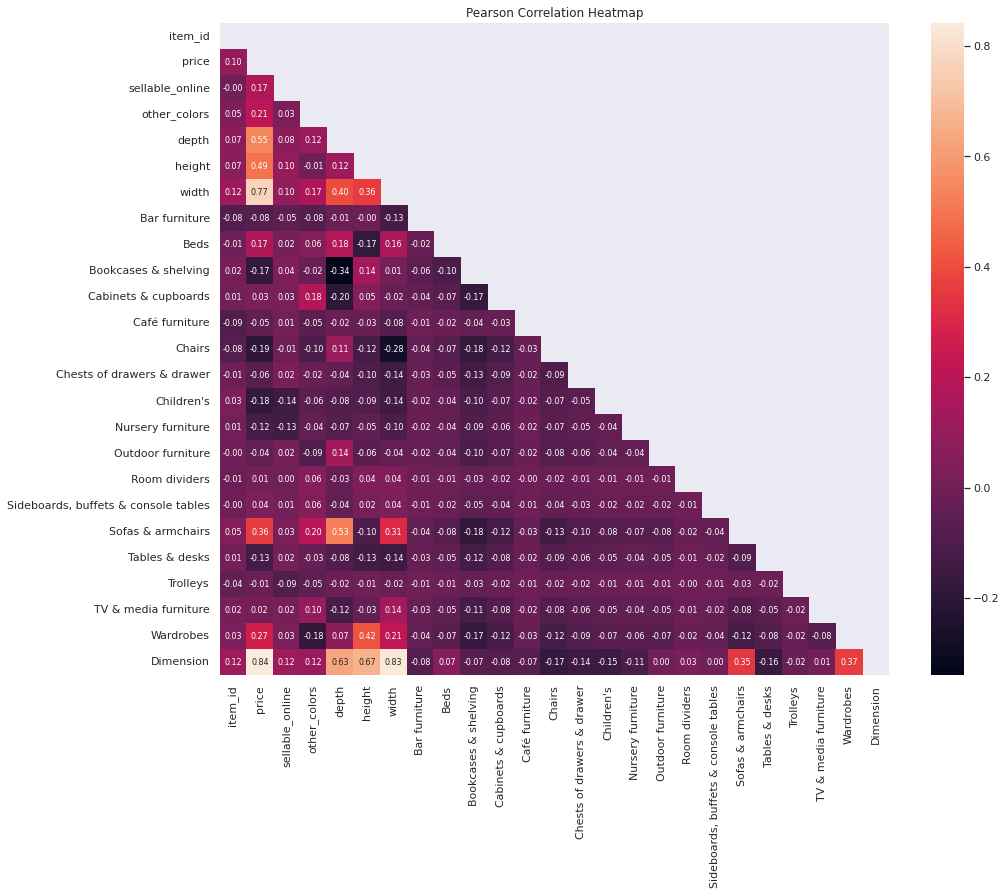

In [ ]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':8}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

Width dan Dimension memiliki korelasi yang **cukup baik** dengan price sebagai variabel target yaitu **0.77** dan **0.84**.

Sedangkan feature Dimension memiliki korelasi yang **sangat baik** dengan width yaitu sebesar **0.83**.

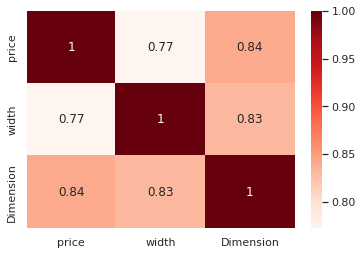

In [ ]:
# Creating a matrix using price, width, dimension as rows and columns
df[['price','width','Dimension']].corr()

#plot the correlation matrix
sns.heatmap(df[['price','width','Dimension']].corr(), annot=True, cmap = 'Reds')
plt.show()

Karena variabel price berkorelasi cukup baik dengan lebih dari 1 variabel yaitu Dimension dan width, maka salah satu harus didrop untuk menghindari terjadinya multikolinieritas.

#Modeling

##Model Selection

In [ ]:
df.columns

Index(['item_id', 'price', 'sellable_online', 'other_colors', 'depth',
       'height', 'width', 'Bar furniture', 'Beds', 'Bookcases & shelving',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer', 'Children's', 'Nursery furniture',
       'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes',
       'Dimension'],
      dtype='object')

In [ ]:
#Split features and target values 

X = df.drop(['price','item_id', 'width'], axis=1)
y = df['price']

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
def rmse_cv(model):
  return np.sqrt(-cross_val_score(model, X, y, scoring= 'neg_mean_squared_error', cv = 5))

In [ ]:
# Model 1: Linear Regression
model_lr = LinearRegression()
rmse_cv(model_lr).mean()

0.6374896103159187

In [ ]:
# Model 2: Ridge Regression
model_ridge = RidgeCV(alphas=[1, 0.1, 0.01, 0.005])
rmse_cv(model_ridge).mean()

0.6358979995432679

In [ ]:
# Model 3: Lasso Regression
model_lasso = LassoCV(alphas=[1, 0.1, 0.01, 0.005])
rmse_cv(model_lasso).mean()

0.6416295867971733

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Model 4: Random Forest Regression
model_rf = RandomForestRegressor()
rmse_cv(model_rf).mean()

0.5613822546832405

In [ ]:
from sklearn.svm import SVR

# Model 5: Support Vector Regression
model_svr = SVR()
rmse_cv(model_svr).mean()

0.6572083475991083

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Model 6: Decision Tree Regression 
model_dt = DecisionTreeRegressor()
rmse_cv(model_dt).mean()

0.7342841928568715

Dari 6 model diatas dapat diketahui bahwa random forest merupakan model yang paling baik untuk digunakan karena memiliki nilai RMSE yang paling kecil.

##Random Forest Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['price','item_id', 'width'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
compare = pd.DataFrame({'Real Values':y_test, 'RF Regression':y_pred,})

In [ ]:
compare

,Real Values,RF Regression
1380,5.620401,5.571846
1079,7.208600,7.780204
2334,7.276556,7.223327
227,8.485083,8.215008
2496,5.860786,7.481097
...,...,...
3476,7.926964,7.733231
1503,5.170484,5.525668
2635,5.624018,6.289080
1827,5.564520,5.486148


##Hyperparameter Tuning

Random Search Cross Validation in Scikit-Learn

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,
                  119,
                  138,
                  157,
                  176,
                  195,
                  215,
                  234,
                  253,
                  272,
                  291,
                  311,
                  330,
                  349,
                  368,
                  387,
                  407,
                  426,
                  445,
                  464,
                  483,
                  503,
                  522,
                  541,
                  560,
                  579,
                  598,
                  618,
                  637,
                  656,
                  675,
                  694,
                  714,
                  733,
                  75

###Best parameter

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1923; total time=   3.6s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1923; total time=   3.5s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1923; total time=   3.7s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1251; total time=   3.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1251; total time=   3.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1251; total time=   3.5s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimator

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 119, 138, 157,
                                                         176, 195, 215, 234,
                                                         253, 272, 291, 311,
                                                         330, 349, 368, 387,
                                                         407, 426, 445, 464,
                                          

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1366}

###Evaluate the model

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

Base model random forest regression

In [ ]:
base_model = RandomForestRegressor(n_estimators = 300, random_state = 0)
base_model.fit(X_test, y_test)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1636 degrees.
Accuracy = 97.19%.


random forest with random search cross validation

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.3216 degrees.
Accuracy = 94.33%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -2.95%.


Compare prediction values

In [ ]:
random_pred = rf_random.predict(X_test)

In [ ]:
compare = pd.DataFrame({'Real Values':y_test, 'RF Regression':y_pred, 'Random Search':random_pred})

In [ ]:
compare

,Real Values,RF Regression,Random Search
1380,5.620401,5.571846,5.564948
1079,7.208600,7.780204,7.759411
2334,7.276556,7.223327,7.232877
227,8.485083,8.215008,8.223516
2496,5.860786,7.481097,7.495909
...,...,...,...
3476,7.926964,7.733231,7.711020
1503,5.170484,5.525668,5.490636
2635,5.624018,6.289080,6.284331
1827,5.564520,5.486148,5.497445
